In [ ]:
# to ignore the warnings 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

# Libraries 

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os 
import shutil
import math

import tensorflow.keras as K
import tensorflow as tf

import kaggle
from zipfile import ZipFile

os.environ['KAGGLE_USERNAME'] = "mickgillesh"
os.environ['KAGGLE_KEY'] = "6663a560250a4fa0c70c46b6c4fbd8c3"

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50

from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Flatten , Dense, Dropout , MaxPool2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Pre-Processing 

Download Dataset

In [ ]:

!kaggle datasets download -d mostafaabla/garbage-classification

 91% 217M/239M [00:01<00:00, 189MB/s]
100% 239M/239M [00:01<00:00, 141MB/s]


Unzip the dataset


In [ ]:
 
with ZipFile("garbage-classification.zip","r") as zip_ref:
    zip_ref.extractall()

In [ ]:
ROOT_DIR = "./garbage_classification"


image_classes = {}

for dir in os.listdir(ROOT_DIR):
    if dir != '.DS_Store':
        image_classes[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

image_classes

{'battery': 945,
 'biological': 985,
 'brown-glass': 607,
 'cardboard': 891,
 'clothes': 5325,
 'green-glass': 629,
 'metal': 769,
 'paper': 1050,
 'plastic': 865,
 'shoes': 1977,
 'trash': 697,
 'white-glass': 775}

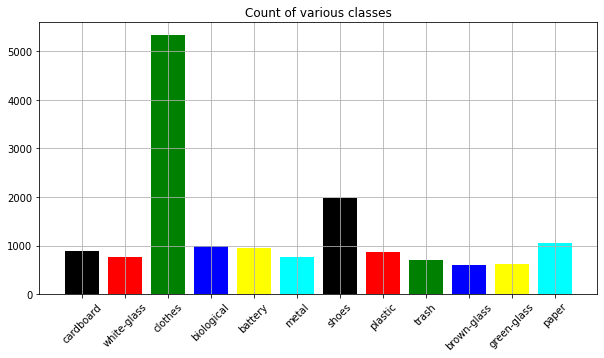

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(x = image_classes.keys(), height= image_classes.values(), color=['black', 'red', 'green', 'blue', 'yellow' ,'cyan'])
plt.title("Count of various classes")
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

As we see here its pretty clear that we have a average of 1000 images in each class... but the number of images in 'Cloths' class is slightly higher! we will randomly remove images to balance the data 


In [ ]:
# we create a training folder 

if not os.path.exists("./train"):
  os.mkdir("./train")

  for dir in os.listdir(ROOT_DIR):
    if dir != '.DS_Store':
      os.makedirs("./train/"+dir)
      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir) ) , 
                                  size= (math.floor(70/100*image_classes[dir])-5) , replace=False ):
        
        O = os.path.join(ROOT_DIR,dir,img)
        D = os.path.join('./train', dir)
        shutil.copy(O,D)
        os.remove(O)
else:
  print("Train Folder exsist")

In [ ]:
# we create a Validation folder 

if not os.path.exists("./val"):
  os.mkdir("./val")

  for dir in os.listdir(ROOT_DIR):
    if dir != '.DS_Store':
      os.makedirs("./val/"+dir)
      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir) ) , 
                                  size= (math.floor(15/100*image_classes[dir])-5) , replace=False ):
        
        O = os.path.join(ROOT_DIR,dir,img)
        D = os.path.join('./val', dir)
        shutil.copy(O,D)
        os.remove(O)
else:
  print("Train Folder exsist")

In [ ]:
# we create a test folder 

if not os.path.exists("./test"):
  os.mkdir("./test")

  for dir in os.listdir(ROOT_DIR):
    if dir != '.DS_Store':
      os.makedirs("./test/"+dir)
      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir) ) , 
                                  size= (math.floor(15/100*image_classes[dir])-5) , replace=False ):
        
        O = os.path.join(ROOT_DIR,dir,img)
        D = os.path.join('./test', dir)
        shutil.copy(O,D)
        os.remove(O)
else:
  print("Train Folder exsist")

In [ ]:
train_path  = "./train"
valid_path  = "./val"
test_path   = "./test"

In [ ]:
train_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input , zoom_range= 0.2, horizontal_flip= True, shear_range= 0.2 , rotation_range=45,  width_shift_range=0.4,  height_shift_range=0.4)

train = train_data_gen.flow_from_directory(directory= train_path , target_size=(224,224), batch_size=64)

Found 10794 images belonging to 12 classes.


In [ ]:
validation_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input)

valid = validation_data_gen.flow_from_directory(directory= valid_path , target_size=(224,224))

Found 2261 images belonging to 12 classes.


In [ ]:
test_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input)
test = train_data_gen.flow_from_directory(directory= test_path , target_size=(224,224), shuffle= False)

Found 2261 images belonging to 12 classes.


In [ ]:
train.class_indices

{'battery': 0,
 'biological': 1,
 'brown-glass': 2,
 'cardboard': 3,
 'clothes': 4,
 'green-glass': 5,
 'metal': 6,
 'paper': 7,
 'plastic': 8,
 'shoes': 9,
 'trash': 10,
 'white-glass': 11}

In [ ]:
t_img , label = train.next()

In [ ]:
def plotImages(img_arr, label):

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


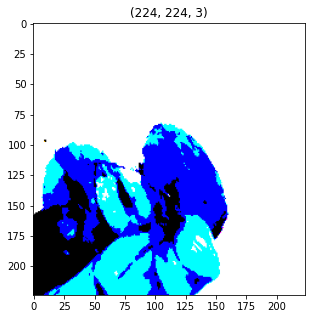

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


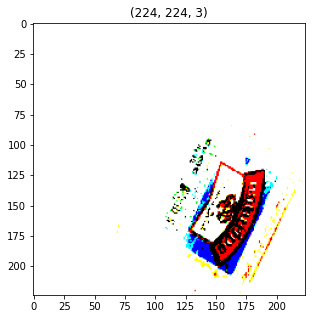

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


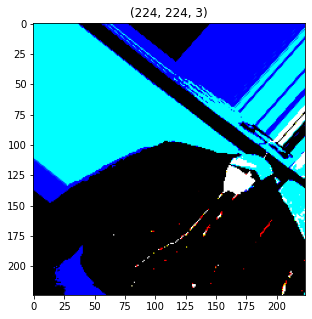

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


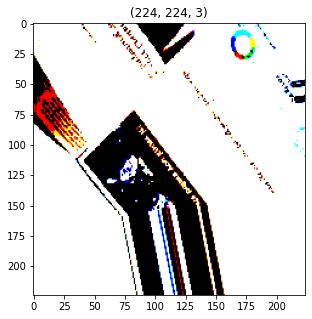

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


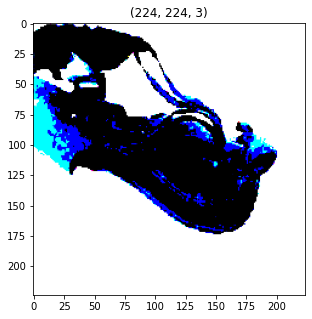

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


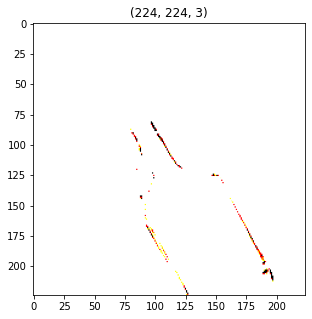

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


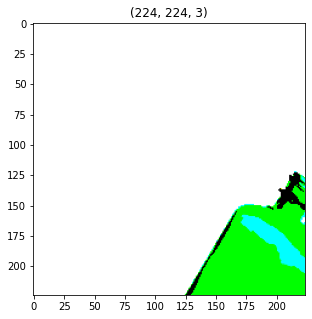

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


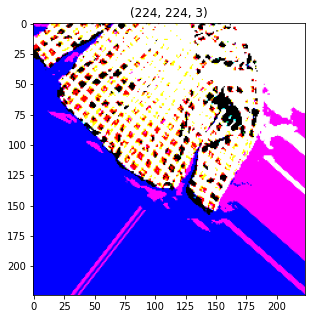

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


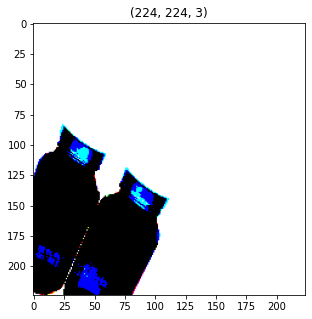

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


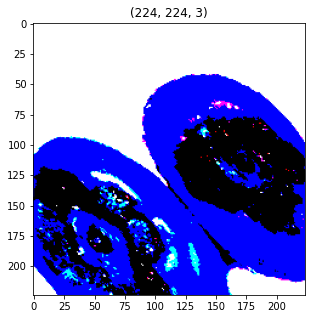

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


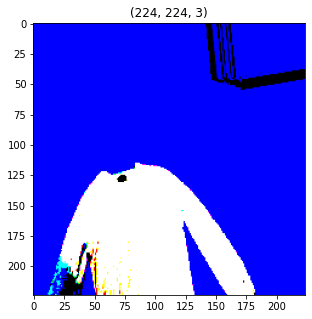

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


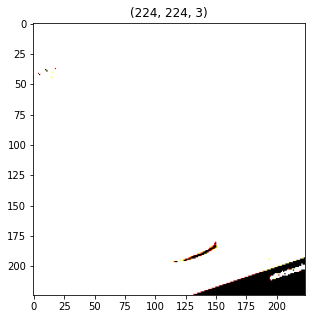

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


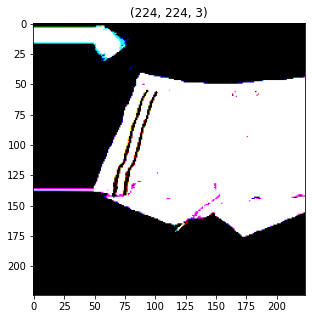

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


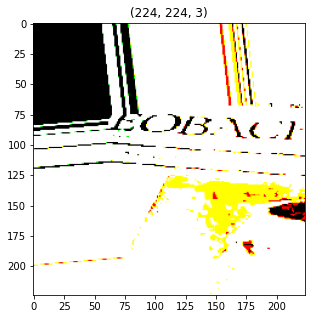

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


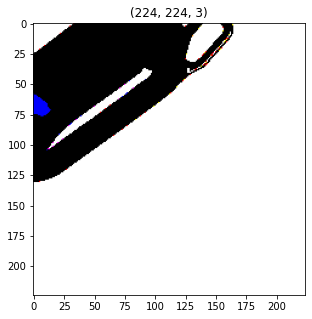

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


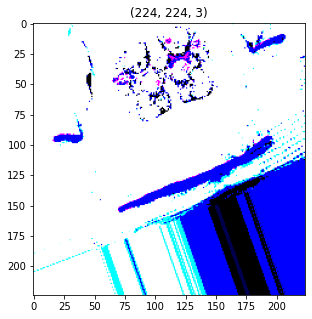

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


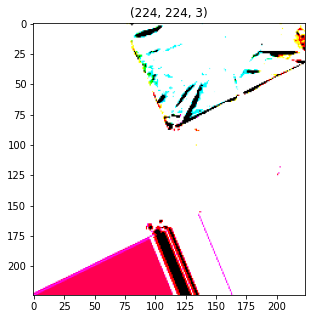

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


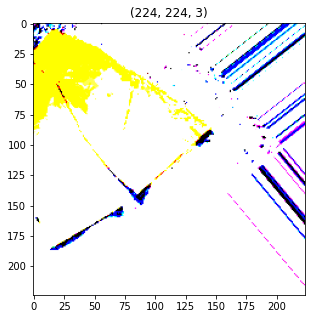

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


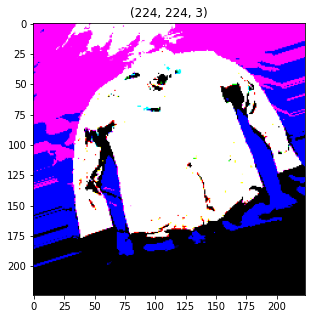

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


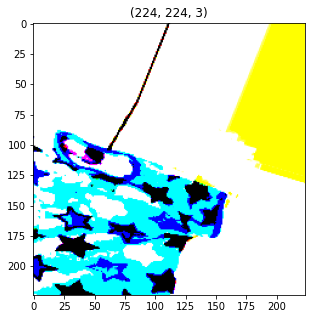

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


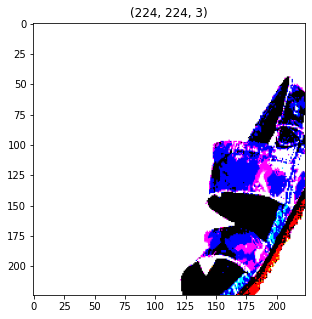

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


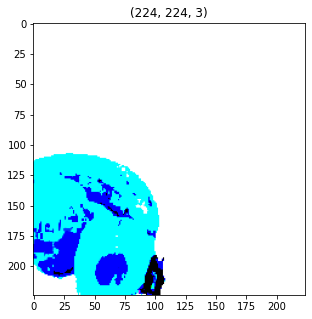

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


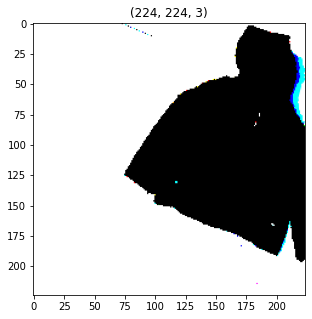

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


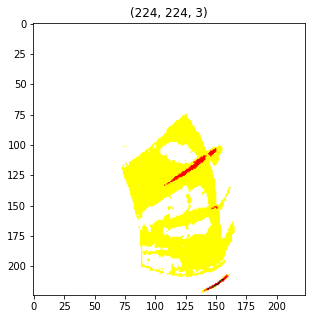

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


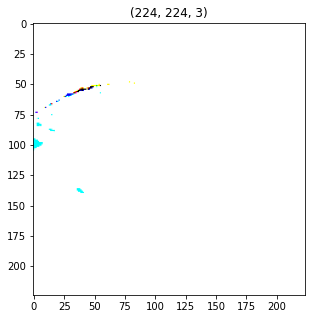

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


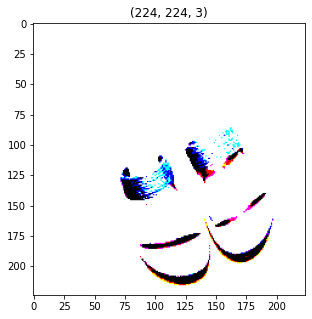

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


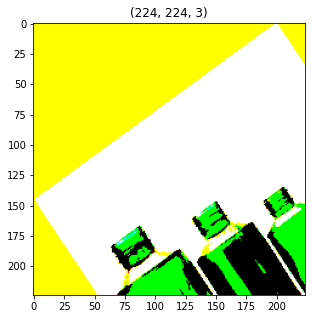

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


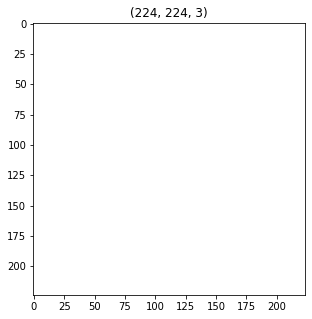

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


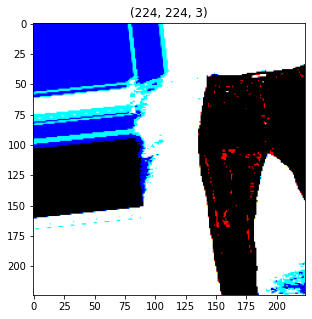

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


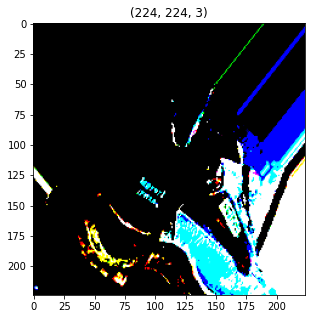

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


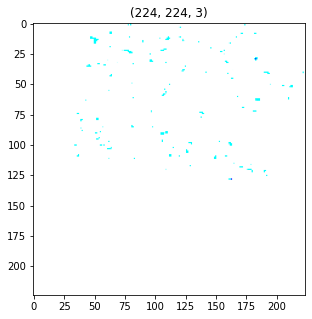

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


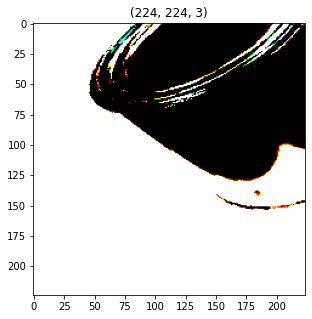

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


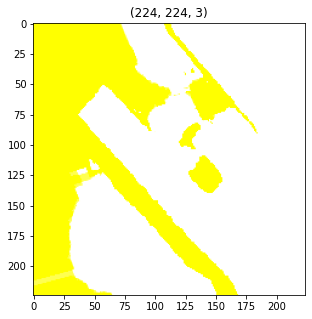

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


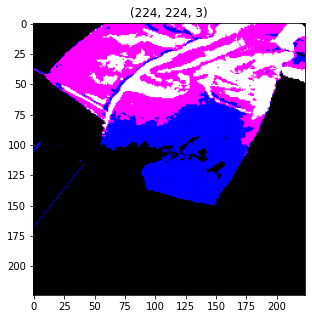

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


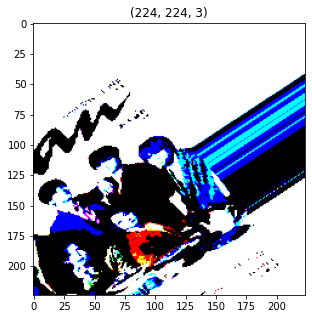

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


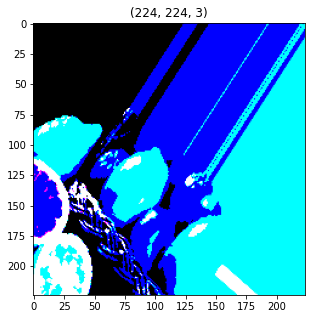

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


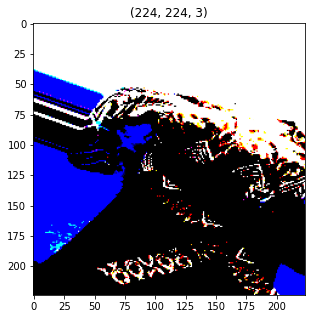

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


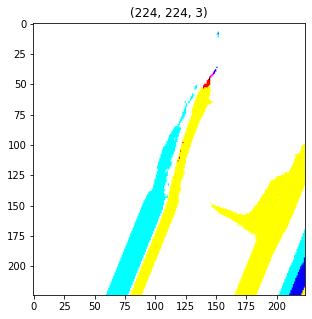

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


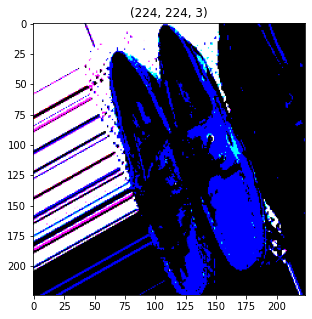

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


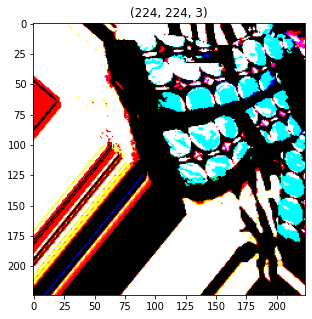

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


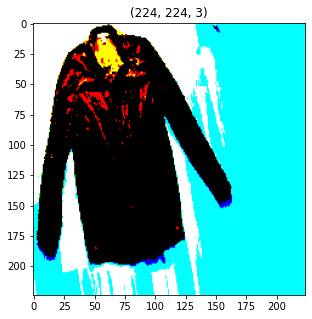

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


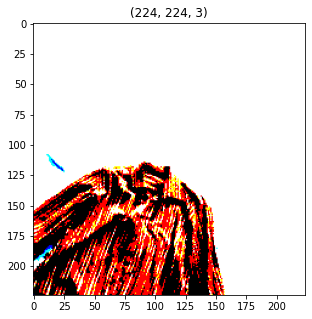

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


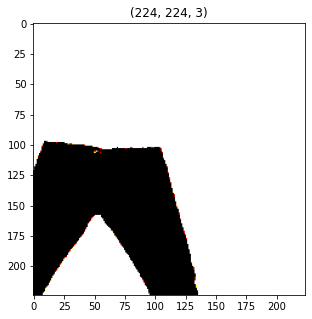

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


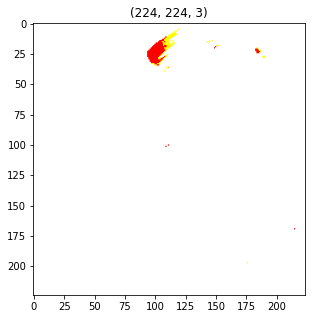

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


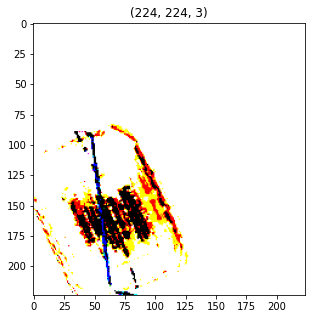

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


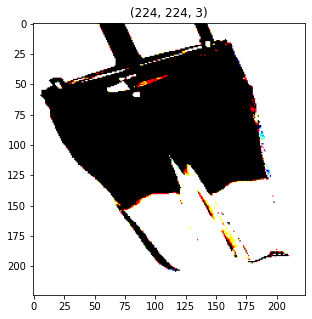

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


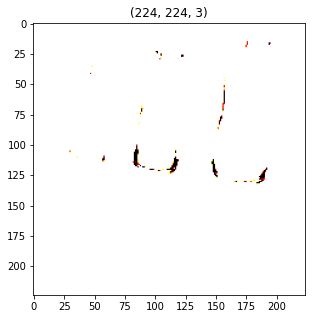

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


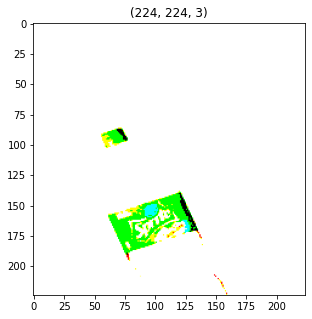

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


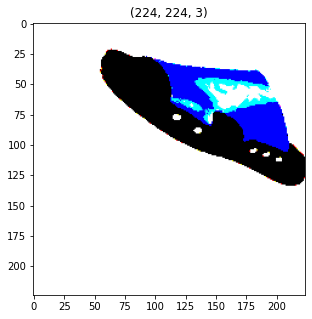

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


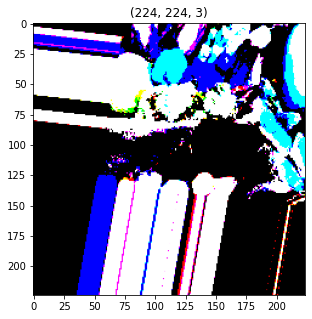

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


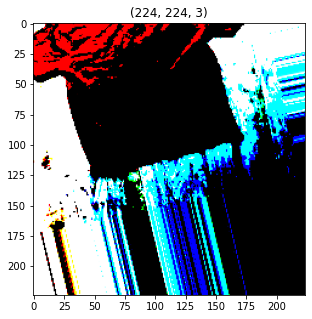

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


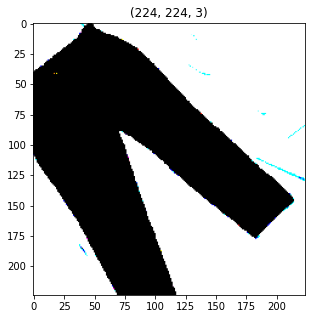

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


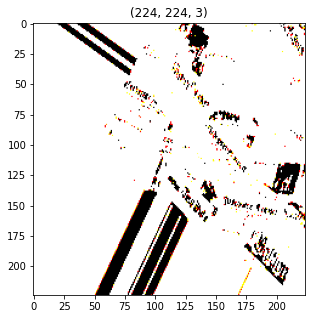

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


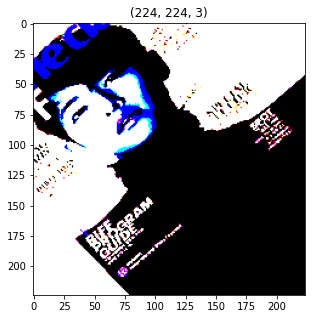

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


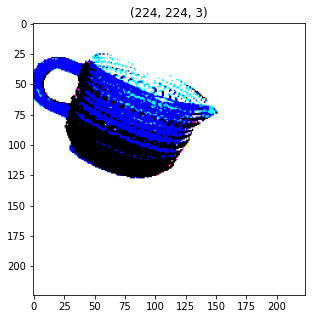

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


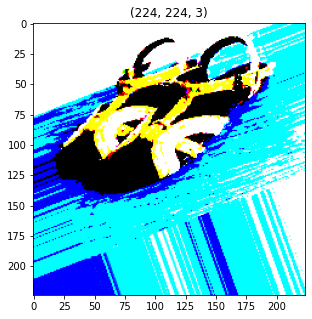

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


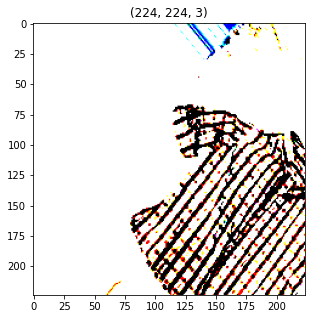

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


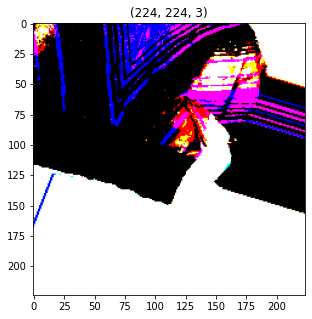

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


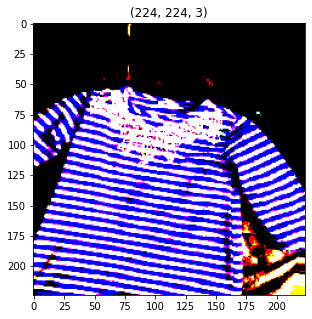

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


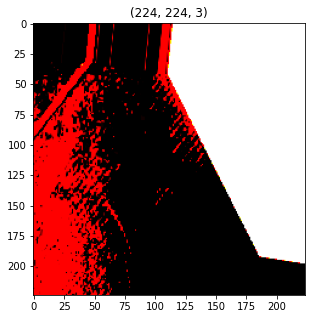

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


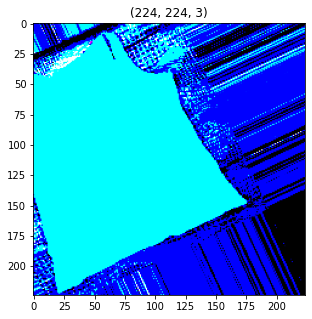

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


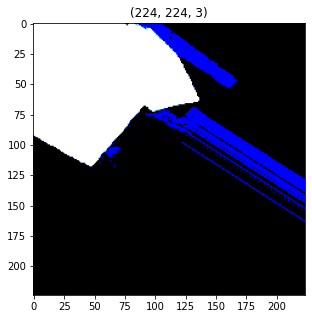

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


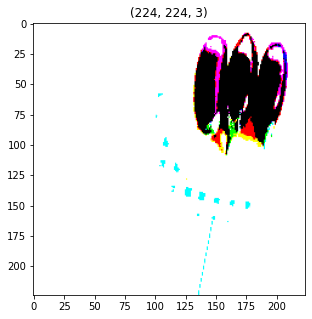

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


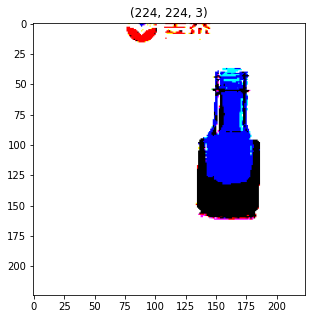

In [ ]:
plotImages(t_img, label)

In [ ]:
ResNet = ResNet50( input_shape=(224,224,3), include_top= False, weights= 'imagenet')

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
#Only allow the final block in the architecture to be trained
for layer in ResNet.layers[:143]:           
    layer.trainable = False

for layer in ResNet.layers[143:]:
    layer.trainable = True


for instance in ResNet.layers:
    print(instance, instance.name, instance.trainable)


In [ ]:
model = K.models.Sequential()
model.add(ResNet)
model.add(K.layers.Flatten())
model.add(K.layers.Dense(units= 12 , activation='softmax', name = 'predictions'))


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 predictions (Dense)         (None, 12)                1204236   
                                                                 
Total params: 24,791,948
Trainable params: 16,180,236
Non-trainable params: 8,611,712
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# implementing early stopping and model check point 

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 8, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [ ]:
hist = model.fit_generator(train, epochs= 30, validation_data= valid , validation_steps= 32, callbacks=[es,mc])

In [ ]:
## load only the best model 
from keras.models import load_model
model = load_model("bestmodel.h5")

In [ ]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

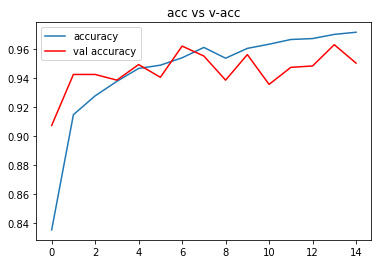

In [ ]:
plt.plot(h['accuracy'] , label = 'accuracy')
plt.plot(h['val_accuracy'] , c = "red", label = 'val accuracy')
plt.title("acc vs v-acc")
plt.legend()
plt.show()

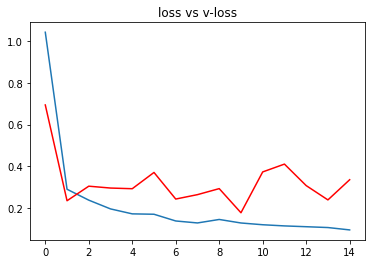

In [ ]:
plt.plot(h['loss'] , label = 'loss')
plt.plot(h['val_loss'] , c = "red", label = 'val loss')
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# checking out the accurscy of our model 

acc = model.evaluate_generator(generator= test)[1] 

print(f"The accuracy of your model is = {acc} %")

The accuracy of your model is = 0.9402918815612793 %
